# Voting Classifier

In [1]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=False)
X.shape, y.shape

((569, 30), (569,))

In [2]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X = std_scl.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression()),
        ("knn", KNeighborsClassifier()),
        ("svm", SVC(probability=True))
    ],
    voting="soft"
)

clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('knn', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [5]:
clf.score(X_test, y_test)

0.9649122807017544

# Bagging

In [6]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=False)
X.shape

(150, 4)

In [7]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X = std_scl.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=10)
clf.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=3)
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [10]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(1.0, 0.9583333333333334)

# Boosting

In [11]:
from sklearn.datasets import make_moons

X_train, y_train = make_moons(n_samples=500, noise=0.3, random_state=42)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [13]:
gb_clf.score(X_train, y_train)

0.974

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50)
ada_clf.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=2)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [15]:
ada_clf.score(X_train, y_train)

0.95

In [16]:
ada_clf.learning_rate

1.0

In [17]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid={
        "estimator": (DecisionTreeClassifier(max_depth=2), ),
        "n_estimators": (50,100,500),
        "learning_rate": (0.01, 0.1, 1)
    }
)

model.fit(X_train, y_train)

,estimator,AdaBoostClassifier()
,param_grid,"{'estimator': (DecisionTreeC...r(max_depth=2),), 'learning_rate': (0.01, ...), 'n_estimators': (50, ...)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [18]:
model.score(X_train, y_train)

0.94

In [19]:
model.best_estimator_

,estimator,DecisionTreeC...r(max_depth=2)
,n_estimators,500
,learning_rate,0.1
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


# Stacking

In [20]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", return_X_y=True, as_frame=False)
X.shape

(70000, 784)

In [21]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X = std_scl.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
    ("svc",SVC()), 
    ("rf_clf", RandomForestClassifier(n_estimators=100, max_depth=5))
]
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

0.962

In [ ]:
y_pred = model.predict(X_test[:1000])

In [ ]:
example = X_test[:1000][y_pred != y_test[:1000]][0]

('7', '9')

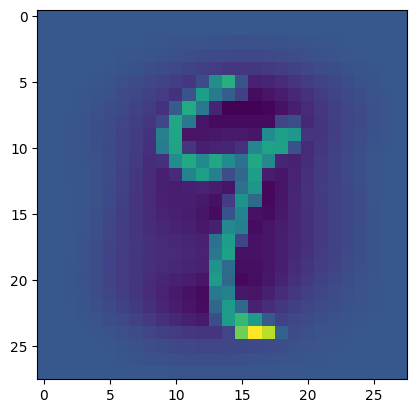

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(example.reshape(28,28))
y_pred[:1000][y_pred != y_test[:1000]][0], y_test[:1000][y_pred != y_test[:1000]][0]